In [2]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join
from MnistReader import MnistDataloader

#
# Set file paths based on added MNIST Datasets
#
input_path = 'data'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

ModuleNotFoundError: No module named 'MnistReader'

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train) 
x_test = np.array(x_test)
y_test = np.array(y_test)

mask = (y_train == 1) | (y_train == 0)

x_train = x_train[mask]
y_train = y_train[mask]

mask = (y_test == 1) | (y_test == 0)

x_test = x_test[mask]
y_test = y_test[mask]

In [ ]:
y_test == 0

array([False,  True, False, ..., False,  True, False])

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=uint8), array([5923, 6742]))

In [ ]:
# Нормализация значений пикселей перед подачей данных персептрону
def normalize(img):
    return np.round(img / 255) # округление до ближайщего целого


# Кодирование меток в унитарном коде
def one_hot(arr):
    y = np.zeros((arr.size, arr.max() + 1))
    y[np.arange(arr.size), arr] = 1
    return y.astype(np.uint8)

# перевод изображения из NxM в K размерность

def flatten(df):
    arrays = []
    for arr in df:
        new_array = np.append(arr.flatten(), 1)
        arrays.append(new_array)
    return np.array(arrays)

def flatten2(arr: np.ndarray):
    print(arr.shape)
    flatten_array = np.zeros((arr.shape[0], arr.shape[1] * arr.shape[2] + 1))
    i = 0
    for array in arr:
        flatten_array[i] = np.append(array.flatten(), 1)
        #flatten_array[i] = array.flatten()
    return flatten_array

In [ ]:
y_train = one_hot(y_train) 
y_test = one_hot(y_test)

In [ ]:
import numpy as np

# Создаем двумерный массив 3x4
original_array = np.array([[1, 2, 3, 4],
                           [5, 6, 7, 8],
                           [9, 10, 11, 12]])

# Получаем размеры исходного массива
M, N = original_array.shape

# Создаем столбец единиц размером Mx1x1 (добавляем дополнительное измерение)
ones_column = np.ones((M, 1, 1))

# Расширяем размерность исходного массива, чтобы он стал 3x4x1
expanded_array = np.expand_dims(original_array, axis=2)

# Объединяем столбец единиц с расширенным массивом
new_array = np.hstack((ones_column, expanded_array))

# Сжимаем обратно до 3x5
new_array = np.squeeze(new_array, axis=2)

# Преобразуем в одномерный массив
flattened_array = new_array.flatten()

print("Исходный массив:")
print(original_array)

print("Новый массив с добавленным столбцом единиц:")
print(new_array)

print("Одномерный массив:")
print(flattened_array)


Исходный массив:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
Новый массив с добавленным столбцом единиц:
[[ 1.  1.  2.  3.  4.]
 [ 1.  5.  6.  7.  8.]
 [ 1.  9. 10. 11. 12.]]
Одномерный массив:
[ 1.  1.  2.  3.  4.  1.  5.  6.  7.  8.  1.  9. 10. 11. 12.]


In [ ]:
print(x_train)
x_train = flatten(normalize(x_train))
print(x_train)
#x_test = flatten(x_test)
print(x_train[0])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [ ]:

np.unique(y_train, return_counts=True)

(array([0, 1], dtype=uint8), array([12665, 12665]))

In [ ]:
print(x_train.shape)
print(x_test.shape)

(12665, 785)
(2115, 28, 28)


# Шаг 1

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [0.         0.        ]
 [0.         0.        ]
 [0.95566783 0.65452423]]
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [0.         0.        ]
 [0.         0.        ]
 [0.95566783 0.65452423]]


<AxesSubplot:>

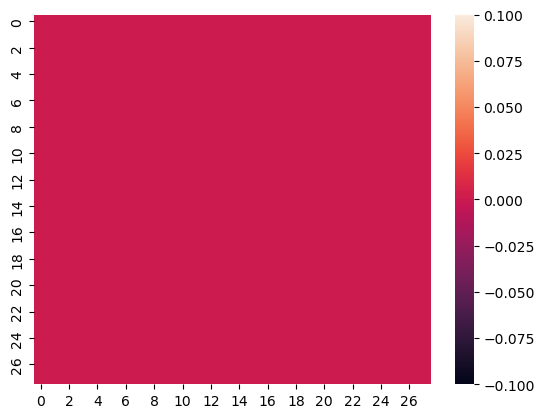

In [ ]:
import seaborn as sns

weights = np.random.randn(2, 784)
weights = np.zeros((784, 2))
bs = np.random.rand(2)
#print(bs)
weights = np.vstack([weights, bs])
print(weights)
#weights.shape
#print(weights)
weights_old = weights.copy()
print(weights_old)
sns.heatmap(np.reshape(weights_old[:-1, 0], (28, 28)))

In [ ]:
print(x_train.shape)
print(weights.shape)

(12665, 785)
(785, 2)


# Шаг 2

In [ ]:
# функция активации

def sigmoid(v):
    return 1 / (1 + np.exp(-v))

def sigmoid_derivative(v):
    return v * (1 - v)

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=1, keepdims=True)

In [ ]:
def predict(arr, weights):
    return sigmoid(np.dot(arr, weights))

In [ ]:
#y_out = np.dot(x_train, weights) # перемножение матриц
#print(y_out.shape)
#print(y_train.shape)
#errors = y_train - y_out # вектор ошибок

confusion_matrix = np.zeros((10, 10))

learning_rate = 0.1
total_loss = 0

for epoch in range(30):
    for i in range(len(x_train)):
        y_out = sigmoid(np.matmul(x_train[i], weights)) # перемножение матриц
        errors = y_train[i] - y_out # вектор ошибок
        
        # Вычисление квадратичной ошибки и добавление к суммарной ошибке
        loss = np.sum(np.square(errors))
        total_loss += loss

        predicted_class = np.argmax(y_out)
        actual_class = np.argmax(y_train[i])
        confusion_matrix[actual_class, predicted_class] += 1
        
        D = x_train[i][np.newaxis].T * errors
        weights += learning_rate * np.outer(x_train[i], errors)
        
    # Вывод средней ошибки после каждой эпохи
    average_loss = total_loss / len(x_train)
    print(f"Epoch {epoch+1}, Average Loss: {average_loss}")
    
    # Сброс суммарной ошибки для следующей эпохи
    total_loss = 0

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'np' is not defined

<AxesSubplot:>

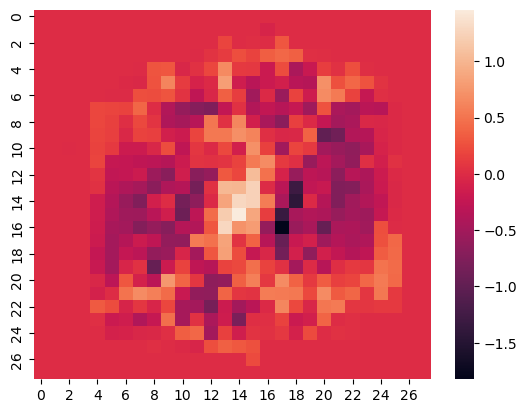

In [ ]:
sns.heatmap(np.reshape(weights[:-1, 1], (28, 28)))

In [ ]:
print(np.unique(weights == weights_old))

[False  True]


Точность: 99.95271867612293


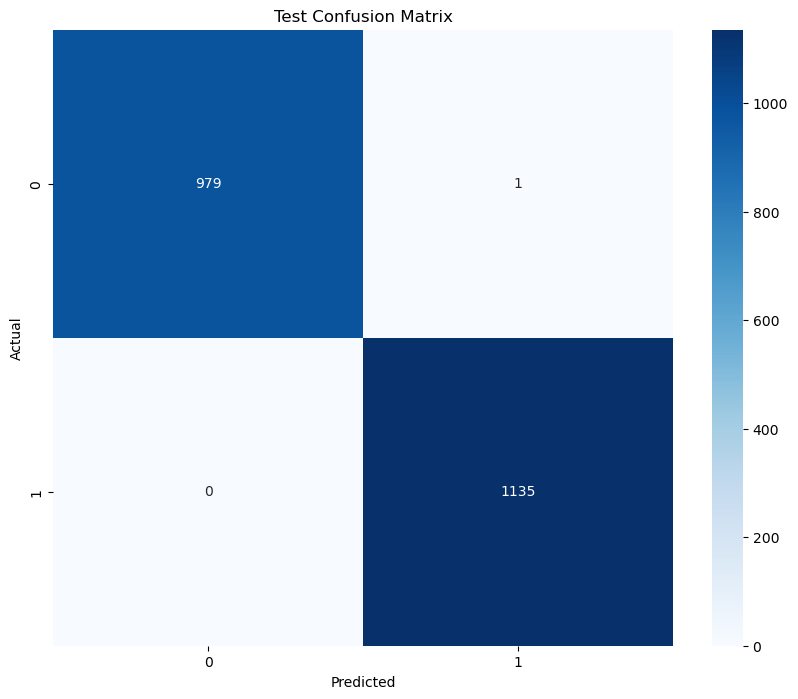

In [ ]:
#test_0 = x_test[5]
#plt.imshow(test_0, cmap='gray')
#test_0 = normalize(test_0)
#t = np.append(test_0.flatten(), 1)
#np.round(predict(t, weights))

confusion_matrix_test = np.zeros((2, 2))
correct_predictions = 0

for i in range(len(x_test)):
    test = x_test[i]
    test = normalize(test)
    test = np.append(test.flatten(), 1)
    result = np.round(predict(test, weights))
    #class_number = np.where(result == 1)
    predicted_class = np.argmax(result)
    actual_class = np.argmax(y_test[i])

    if predicted_class == actual_class:
        correct_predictions += 1

    confusion_matrix_test[actual_class, predicted_class] += 1

print(f'Точность: {correct_predictions / len(x_test) * 100}')

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_test, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Test Confusion Matrix')
plt.show()

 